# Regresión Lineal

Un modelo sencillo como el de regresión lineal nos va a servir de base y para empezar a ver como implementar un modelo matemático en código.

El problema puede ser descripto por un conjunto de datos $\{x_{i1},x_{i2},...,x_{iN},z_i\}_{i=1}^P$, en donde cada $z_i$ de los $P$ conocidos son el resultado de una combinación lineal de $N$ variables $x$ con $N+1$ valores $a$ que no conocemos.

$$z_i = a_1 x_{i1} + a_2 x_{i2} + ... + a_N x_{iN} + a_{N+1}$$

El objetivo va a ser utilizar los $x$ y $z$ que conocemos para encontrar una aproximación $w$ a los valores $a$ desconocidos. Y para hacer el problema un poco más interesante vamos a asumir que tenemos $M$ valores de $z$ por instancia resultantes de distintos $a$, es decir nuestro conjunto de datos será $\{x_{i1},...,x_{iN},z_{1i},...,z_{Mi}\}_{i=1}^P$.

Y bajo estas condiciones podemos pensar en $a$ como una matriz de $N+1$ por $M$.

In [1]:
# Empecemos por importar la librería numpy que nos va a ayudar con las operaciones algebráicas.

import numpy as num

In [2]:
# Y establezcamos las dimensiones de los datos que vamos a utilizar.

N = 4
M = 2
P = 100

In [3]:
# Vamos a tener que generar nuestros propios datos al azar para el problema.

# Primero vamos a necesitar una matriz de mezcla para la combinación lineal.
a = num.random.uniform( -1, 1, (N+1,M))

# Y los valores x de entrada con una columna extra que podremos en 1.
x = num.random.uniform( -9, 9, (P,N+1))
x[:,-1] = 1    # Esto indica que a todas las filas ':', en la última columna '-1', le asigne el valor '1'.

print( x[:5])  # Veamos las primeras 5 filas de x.

[[-6.13369483 -3.48148494 -8.7506678   0.46465937  1.        ]
 [ 4.97427023  6.90575164  0.55842264 -8.97889096  1.        ]
 [ 2.75269566  4.44686046  5.22487717 -4.00659723  1.        ]
 [-7.38359253  1.30471883  1.14541455 -4.28205579  1.        ]
 [-1.45554029 -8.63877671  8.90056651  1.67885845  1.        ]]


In [4]:
# Con esto podemos generar Z facilmente como en producto entre X y A.

z = num.dot(x, a)

In [5]:
# Nuestro modelo va a consistir en la matriz W inicializada también al azar con valores pequeños.

w = num.random.normal(0, 0.1, (N+1,M))

El proceso de aprendizaje, es decir, encontrar un $w$ que *explique* suficientemente bien los $z$ dados los $x$, lo vamos a realizar iterativamente de la siguiente manera.

1. Generar una respuesta $y$ del modelo: $$y = x\bullet w$$
2. Calcular la diferencia entre la respuesta deseada y la obtenida: $$ d = z-y $$
3. Usar esta diferencia para calcular las correcciones a $w$: $$ \triangle w = x^T \bullet d $$
4. Aplicar estas correcciones en intervalos pequeños: $$ w = w + \eta \triangle w $$
5. Si el error es muy alto volver al paso 1: $$ (\sum d^2) > \epsilon $$

Las correcciones $\triangle w$ consisten en una matriz de las mismas dimensiones que $w$ en donde cada valor será proporcional al valor de entrada $x$ y el error $z-y$ cometido en la salida.

$$ \triangle w_{ij} = x_i \dot (z_j - y_j) $$

El valor $\eta$ es el llamado *coeficiente de aprendizaje* o *learning rate*, generalmente elegido como un valor pequeño, para que las correcciones se apliquen gradualmente.

Como no siempre vamos a estar seguros de poder encontrar una buena solución, vamos a incluir un término extra a la condición de finalización del algoritmo. Este será de un valor *t* que permitirá detener el proceso después de una cierta candidad de pasos.
 

In [6]:
lr = 1e-5
E = []
e = 1
t = 0
while (e>0.01) and (t<999):
    y = num.dot( x, w)
    d = z-y
    dw = num.dot( x.T, d)
    w = w + lr*dw
    e = num.mean( num.square( d))
    E.append(e)
    t += 1
    if t%100==0:
        print(t, e)

100 0.3584856084933962
200 0.19297386260823216
300 0.1605884339943905
400 0.1343203938098772
500 0.112356547066943
600 0.09398430815108856
700 0.0786162503957011
800 0.06576113558344136
900 0.0550080540797544


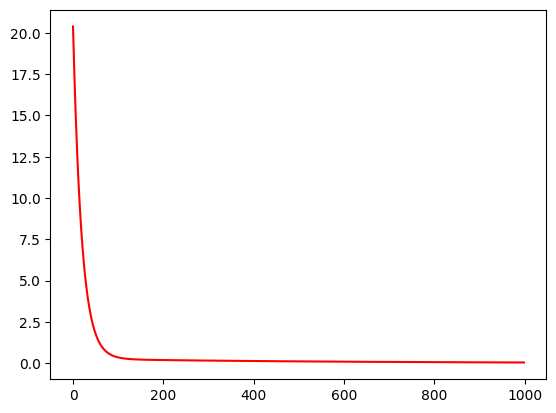

In [7]:
# Finalmente podemos graficar la evolución del error durante el entrenamiento.

from matplotlib import pyplot as mpl

mpl.plot(E,'r')
mpl.show()


Este sencillo ejemplo es una simplificación de la técnica de regresión lineal y tiene como objetivo ilustrar el uso de las herramientas de programación que vamos a utilizar más adelante.

[Para profundizar más sobre el tema.](https://es.wikipedia.org/wiki/Regresi%C3%B3n_lineal)
